In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.optimize as sp
from scipy.signal import find_peaks

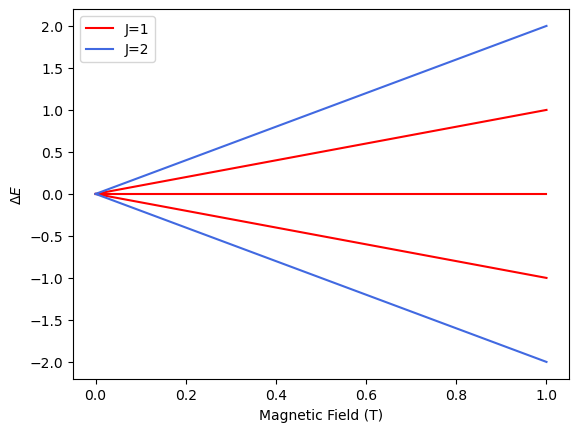

In [13]:
x = np.linspace(0,1,1000)

plt.plot(x,-1*x,label='J=1',color='red')
plt.plot(x,0*x,color='red')
plt.plot(x,x,color='red')
plt.plot(x,2*x,label='J=2',color='royalblue')
plt.plot(x,-2*x,color='royalblue')
plt.xlabel('Magnetic Field (T)')
plt.ylabel(r'$\Delta E$')
plt.legend()
plt.savefig('../Figures/theory',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

In [26]:
# File extraction

def openfile(current,polarisation):
    prefix = int(current)
    suffix = int(round((current-prefix)*100))
    formatted_current = f"{prefix}d{suffix:02d}A"
    file = f'../Data/nonpolarised/NZE01_{formatted_current}_{polarisation}_NoPol_data.txt'
    return pd.read_csv(file,sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python'), formatted_current

openfile(0,'Para') # Example

(      Radius  Intensity
 0        0.0  19.250000
 1        1.0   8.000000
 2        2.0  19.250000
 3        3.0  13.367890
 4        4.0  11.696413
 ...      ...        ...
 2995  2995.0   0.000000
 2996  2996.0   0.000000
 2997  2997.0   0.000000
 2998  2998.0   0.000000
 2999  2999.0   0.000000
 
 [3000 rows x 2 columns],
 '0d00A')

In [140]:
current = 0
while current < 4.5:
    df, formatted_current = openfile(current,'Para')
    radius = df['Radius'][0:2000]*1.84
    intensity = df['Intensity'][0:2000]

    peaks, _ = find_peaks(intensity,prominence=2,height=100)
    
    for i in range(len(peaks)):
        plt.plot(peaks[i]*1.84,intensity[peaks[i]],marker='x',color='red')

    plt.scatter(radius,intensity,marker='.',c='royalblue',label=f'Parallel, Current: {current}A')

    plt.xlabel(r'Radius ($\mu m$)')
    plt.ylabel('Intensity')
    plt.legend()
    plt.savefig(f'../Figures/{formatted_current}_Para',bbox_inches = 'tight',pad_inches=0.1)
    plt.clf()
    current += 0.5

current = 0
while current < 4.5:
    df, formatted_current = openfile(current,'Perp')
    radius = df['Radius'][0:2000]*1.84
    intensity = df['Intensity'][0:2000]

    peaks, _ = find_peaks(intensity,prominence=2,height=100)
    
    for i in range(len(peaks)):
        plt.plot(peaks[i]*1.84,intensity[peaks[i]],marker='x',color='red')

    plt.scatter(radius,intensity,marker='.',c='royalblue',label=f'Perpendicular, Current: {current}A')

    plt.xlabel(r'Radius ($\mu m$)')
    plt.ylabel('Intensity')
    plt.legend()
    plt.savefig(f'../Figures/{formatted_current}_Perp',bbox_inches = 'tight',pad_inches=0.1)
    plt.clf()
    current += 0.5

<Figure size 640x480 with 0 Axes>

In [40]:
polarised ={
'lin0perp' : pd.read_csv('../Data/polarised/NZE01_4d00A_Perp_LinPol0_data.txt',sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python'),
'lin90perp' : pd.read_csv('../Data/polarised/NZE01_4d00A_Perp_LinPol90_data.txt',sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python'),
'linm90perp' : pd.read_csv('../Data/polarised/NZE02_4d00A_Perp_LinPolm90_data.txt',sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python'),
'circperp' : pd.read_csv('../Data/polarised/NZE01_4d00A_Perp_CircPolN_data.txt',sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python'),
'circparaN' : pd.read_csv('../Data/polarised/NZE01_4d00A_Para_CircPolN_data.txt',sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python'),
'circparaS' : pd.read_csv('../Data/polarised/NZE02_4d00A_Para_CircPolS_data.txt',sep=r'\s+',skiprows=6,skipfooter=1,names=['Radius','Intensity'],engine='python')}

In [141]:
for key in polarised:
    df = polarised[key]
    radius = df['Radius'][0:2000]*1.84
    intensity = df['Intensity'][0:2000]

    peaks, _ = find_peaks(intensity,prominence=2,height=100)
    
    for i in range(len(peaks)):
        plt.plot(peaks[i]*1.84,intensity[peaks[i]],marker='x',color='red')

    plt.scatter(radius,intensity,marker='.',c='royalblue',label=f'{key}')

    plt.xlabel(r'Radius ($\mu m$)')
    plt.ylabel('Intensity')
    plt.legend()
    plt.savefig(f'../Figures/{key}',bbox_inches = 'tight',pad_inches=0.1)
    plt.clf()

<Figure size 640x480 with 0 Axes>

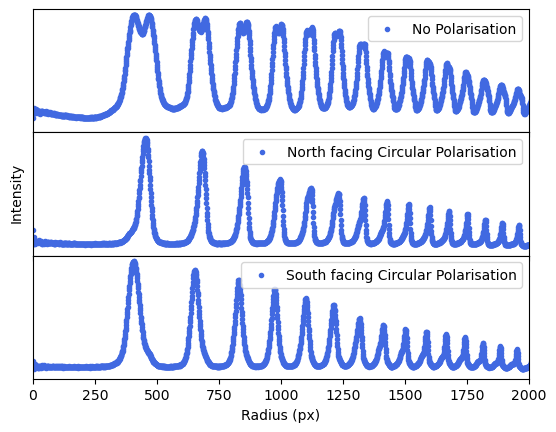

In [59]:
nopol, formatted = openfile(4,'Para')
circN = polarised['circparaN']
circS = polarised['circparaS']

f, axes = plt.subplots(3,1, sharex=True)
plt.setp(axes,label=r'Radius ($\mu$m)',yticks=[])
graph0 = axes[0].scatter(nopol['Radius'],nopol['Intensity'],c='royalblue',label='No Polarisation',marker='.')
graph1 = axes[1].scatter(circN['Radius'],circN['Intensity'],c='royalblue',label='North facing Circular Polarisation',marker='.')
graph2 = axes[2].scatter(circS['Radius'],circS['Intensity'],c='royalblue',label='South facing Circular Polarisation',marker='.')
axes[-1].set_xlabel('Radius (px)')
for i in range(3):
    axes[i].legend(loc='upper right')
    axes[i].set_xlim(0,2000)
f.text(0.1, 0.5, 'Intensity', ha='center', va='center', rotation='vertical')
f.subplots_adjust(hspace=0)
plt.savefig('../Figures/comparePara',bbox_inches = 'tight')

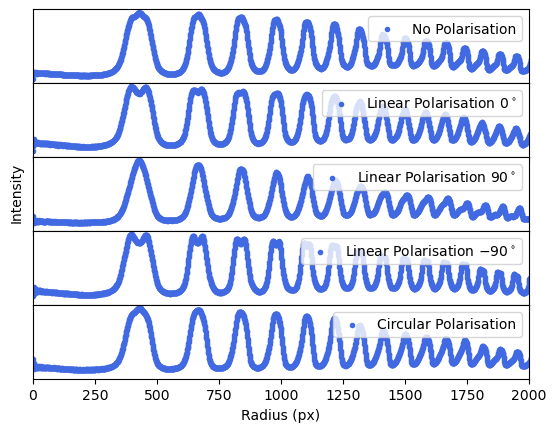

In [58]:
nopol, formatted = openfile(4,'Perp')
lin0 = polarised['lin0perp']
lin90 = polarised['lin90perp']
linm90 = polarised['linm90perp']
circ = polarised['circperp']

f, axes = plt.subplots(5,1,sharex=True)
plt.setp(axes,label=r'Radius ($\mu$m)',yticks=[])
graph0 = axes[0].scatter(nopol['Radius'],nopol['Intensity'],c='royalblue',label='No Polarisation',marker='.')
graph1 = axes[1].scatter(lin0['Radius'],lin0['Intensity'],c='royalblue',label=r'Linear Polarisation $0^\circ$',marker='.')
graph2 = axes[2].scatter(lin90['Radius'],lin90['Intensity'],c='royalblue',label=r'Linear Polarisation $90^\circ$',marker='.')
graph2 = axes[3].scatter(linm90['Radius'],linm90['Intensity'],c='royalblue',label=r'Linear Polarisation $-90^\circ$',marker='.')
graph2 = axes[4].scatter(circ['Radius'],circ['Intensity'],c='royalblue',label='Circular Polarisation',marker='.')
axes[-1].set_xlabel('Radius (px)')
for i in range(5):
    axes[i].legend(loc='upper right')
    axes[i].set_xlim(0,2000)
f.text(0.1, 0.5, 'Intensity', ha='center', va='center', rotation='vertical')
f.subplots_adjust(hspace=0)
plt.savefig('../Figures/comparePerp',bbox_inches = 'tight')

[ 756.24  859.28 1210.72 1275.12 1534.56 1584.24 1803.2  1841.84 2033.2
 2068.16 2239.28 2270.56 2428.8  2454.56 2605.44 2769.2  2921.92]
FWHM = 119.11086930399723
50.57786382335339


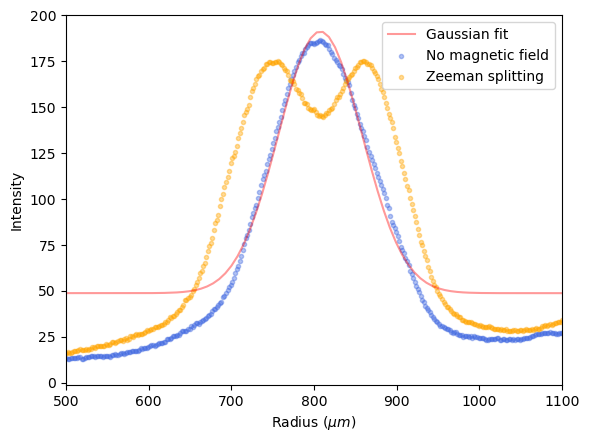

In [151]:
# Calculating Bohr Magneton
df0A = openfile(0,'Para')[0]
df4A = openfile(4,'Para')[0]

radius_0 = df0A['Radius'][0:2000]*1.84
radius_split = df4A['Radius'][0:2000]*1.84

intensity_0 = df0A['Intensity'][0:2000]
intensity_split = df4A['Intensity'][0:2000]

peaks_0, _ = find_peaks(intensity_0,prominence=2,height=100)
peaks_split, _ = find_peaks(intensity_split,prominence=2,height=100)

print(peaks_split*1.84)

def gaussian(x, amp, mean, sigma, offset):
    return amp * np.exp(-(x - mean)**2 / (2 * sigma**2)) + offset

p0 = [max(intensity_0), radius_0[np.argmax(intensity_0)], 1, min(intensity_0)]

popt, pcov = sp.curve_fit(gaussian, radius_0, intensity_0, p0=p0)
amp_fit, mean_fit, sigma_fit, offset_fit = popt

fwhm = 2.355 * sigma_fit
print(f"FWHM = {fwhm}")
print(sigma_fit)

xfit = np.linspace(min(radius_0), max(radius_0), 500)
yfit = gaussian(xfit, *popt)
plt.plot(xfit, yfit, 'r-', label='Gaussian fit',alpha=0.4)

plt.scatter(radius_0,intensity_0,c='royalblue',marker='.',alpha=0.4,label='No magnetic field')
plt.scatter(radius_split,intensity_split,c='orange',marker='.',alpha=0.4, label='Zeeman splitting')
plt.xlabel(r'Radius ($\mu m$)')
plt.ylabel('Intensity')
plt.xlim(500,1100)
plt.legend()
plt.savefig(f'../Figures/bohrmag',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

In [148]:
h = 6.626 * 1e-34
n = 1
f = 100 * 1e-3
d = 3 * 1e-3
c = 3e8
B = 143.6e-3

peaks_z = peaks_split[0:2]*1.84
peak = peaks_0[0]

m = 2*n*d/(643.8 * 1e-9) * (1-0.5*(peak*1e-6/f)**2)

def energy(r):
    wavelength = 2*n*d/m*(1-0.5*(r*1e-6/f)**2)
    return h*c/wavelength, wavelength

energy_split = abs(energy(peaks_z[0])[0] - energy(peaks_z[1])[0])

print(energy(peaks_z))

bohrmag = energy_split/(2*B)
print(bohrmag)

(array([3.08766339e-19, 3.08768909e-19]), array([6.43787794e-07, 6.43782436e-07]))
8.94848962980902e-24
